### Fourier Analysis ###

**What am I meant to do?**

Write a code that does a fourier analysis similar to the one done by numpy.fft.rfft() 

**An example of how this works:**

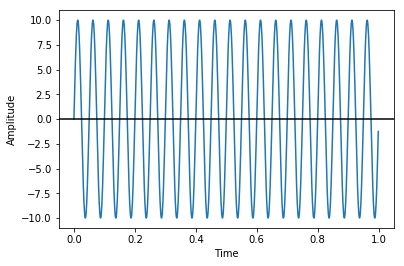

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

f = 20 # frequency
a = 10 # amplitude
t = np.arange(0, 1, 0.001) # 1 is not included as a value here, this part sets the values for the x-axis
y = np.sin(f * 2*pi*t) * a # this is the sin function
plt.plot(t, y) # plotting t against y
plt.xlabel('Time') # labelling the axes
plt.ylabel('Amplitude')
plt.axhline(y=0, color='k') # makes an axis line show up at y=0
plt.show()

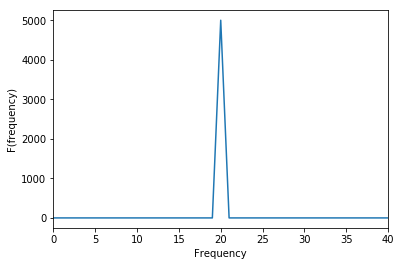

In [2]:
Y = np.fft.rfft(y) # this applies a fourier transform to y from above
freq = np.fft.rfftfreq(len(y), d=0.001) 
plt.plot(freq, abs(Y))
plt.xlabel('Frequency')
plt.ylabel('F(frequency)')
plt.xlim([0,40])  # the frequency range without this limit is up to 500
plt.show()

**Fourier Series**

*The Chemistry Maths Book, Erich Steiner, 2nd Edition*

Expansion of a function in the terms of trigonometric functions

$$f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty}(a_n\cos{nx}+b_n\sin{nx})$$

Fourier Coefficients are given by:
$$a_0=\frac{1}{\pi}\int_{-\pi}^{+\pi}f(x)\,dx$$

$$a_n = \frac{1}{\pi}\int_{-\pi}^{+\pi}f(x)\cos{nx}\,dx$$

$$b_n = \frac{1}{\pi}\int_{-\pi}^{+\pi}f(x)\sin{nx}\,dx$$

**Fourier Transforms**

Fourier series are useful if a function is periodic. For non-periodic functions the Fourier analysis is achieved by letting the width of the base interval become infinitely large and by transforming the Fourier into an infinite integral (Fourier Integral or Fourier Transform)

Equations from [here](http://lpsa.swarthmore.edu/Fourier/Xforms/FXformIntro.html)

Fourier Transform:

$$F(\omega) = \int_{-\infty}^{\infty}f(t)\,e^{-i\omega t}\,dt$$

$$f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}F(\omega)\,e^{i\omega t}\,d\omega$$

Fourier transform (Radian Frequency):

$$F(\omega) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}f(t)\,e^{-i\omega t}\,dt$$

$$f(t) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}F(\omega)\,e^{i\omega t}\,d\omega$$

Fourier transform (Hertz Frequency):

$$F(\omega) = \int_{-\infty}^{\infty}f(t)\,e^{-i2\pi\omega t}\,dt$$

$$f(t) = \int_{-\infty}^{\infty}F(\omega)\,e^{i2\pi\omega t}\,d\omega$$

Fourier transforms convert a function of time to a function of frequency, the inverse Fourier transform does the opposite.

A Fast Fourier Transform (FFTs) is an algorithm for numerically using Fourier Transforms

In [3]:
import scipy.integrate

In [4]:
# seeing how integration works here

from math import sin, pi
from scipy.integrate import quad
import numpy as np

def f(t):
    return sin(20 * 2*pi*t) * 10

F = quad(f, 0, pi/2)

print F

(0.1483078062590431, 3.4156692196862792e-09)


The values returned are the integral of the function and an estimate of the absolute error

In [5]:
# using infinite limits

def f(t):
    return sin(20 * 2*pi*t) * 10

F = quad(f, -np.inf, +np.inf)

print F

(0.0, 0.0)


This is what you would expect for the area under a sine curve over infinite time

Need to integrate a function multiplied by $e^{-i\omega t}$ but only real numbers can be returned. Maybe using the absolute value will work?

In [6]:
def f(t):
    c = exp(abs(-1j * 20 * t))
    return sin(20 * 2*pi*t) * 10 * c

F = quad(f, -np.inf, +np.inf)

print F

NameError: global name 'exp' is not defined

Maybe not.

I'm going to try using Discrete Fourier Transforms instead as looking through the guide [numpy.fft](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html) it seems this is the method that the FFT uses.

**Discrete Fourier Transform**

$$X_k=\sum_{n=0}^{N-1}x_n\,exp\left({\frac{-i2\pi k n}{N}}\right )$$

Where $x_n$ will be the value of a given function at point n, N is the total number of points (n could be time n, n+dt, n+2dt where dt is the timestep and N the total time) $X_k$ will be the Fourier coefficients.

In [7]:
import cmath  # mathematical function for complex numbers can be dealt with using this
from math import pi
import matplotlib.pyplot as plt
import numpy as np

def FT(function):
    N = len(function)  # this gives the total number of timesteps
    Frequencies = []  # creates a list for output frequencies to be added to
    for n in range(N):  # a loop up to N-1
        f = 0  # reset f to 0 so get the FT at each value
        f += function[n] * cmath.exp(-1j * 2 * pi * n / N)  # k should be included in here
        # function[n] calls the nth value of the function
        # not sure what k is in the equation so not included at the moment.
        Frequencies.append(f)
    return Frequencies

In [8]:
t = np.arange(0, 1, 0.001)
y = np.sin(20 * 2* pi *t) * 10

FT(y)

[0j,
 (1.2533075959357614-0.0078748675015354892j),
 (2.486702516568108-0.031250470407000248j),
 (3.6805915623432774-0.069385734390387532j),
 (4.8160153112862432-0.12106515810354605j),
 (5.8749521575255361-0.18462780949435731j),
 (6.8406071648112095-0.25800705468627311j),
 (7.6976810613865503-0.33878017423847662j),
 (8.4326150269335489-0.42422680936988016j),
 (9.0338073176260885-0.51139498965069352j),
 (9.4917982350844117-0.59717332759911579j),
 (9.7994204616612439-0.67836782794256201j),
 (9.9519123495023365-0.75178165283995335j),
 (9.9469923549173007-0.81429611133830182j),
 (9.7848934428369301-0.86295110333055158j),
 (9.4683569381136437-0.89502324619119034j),
 (9.0025859604325831-0.90809994629259905j),
 (8.3951592368091195-0.90014774724605473j),
 (7.6559067292747329-0.86957339076818896j),
 (6.796749134852047-0.81527616267268799j),
 (5.831503900152021-0.7366902631122606j),
 (4.7756609343280241-0.63381613373544499j),
 (3.6461316928600831-0.50723989122574153j),
 (2.4609757327632824-0.3581

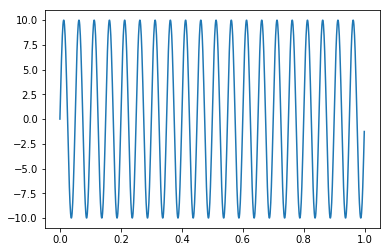

In [9]:
plt.plot(t, y)
plt.show()

/home/mb17g15/.local/miniconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


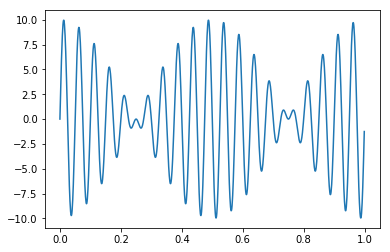

In [10]:
plt.plot(t, FT(y))
plt.show()

Want to use the absolute values of the complex numbers so information isn't lost

In [11]:
def FT(function):
    N = len(function)  # this gives the total number of timesteps
    Frequencies = []  # creates a list for output frequencies to be added to
    for n in range(N):  # a loop up to N-1
        f = 0  # reset f to 0 so get the FT at each value
        f += abs(function[n] * cmath.exp(-1j * 2 * pi * n / N))  # k should be included in here
        # function[n] calls the nth value of the function
        # not sure what k is in the equation so not included at the moment.
        Frequencies.append(f)
    return Frequencies

In [12]:
t = np.arange(0, 1, 0.001)
y = np.sin(20 * 2* pi *t) * 10

FT(y)

[0.0,
 1.2533323356430426,
 2.4868988716485476,
 3.6812455268467792,
 4.8175367410171521,
 5.8778525229247318,
 6.8454710592868873,
 7.7051324277578912,
 8.4432792550201512,
 9.0482705246601967,
 9.5105651629515346,
 9.8228725072868865,
 9.980267284282716,
 9.9802672842827178,
 9.8228725072868865,
 9.5105651629515364,
 9.0482705246601949,
 8.4432792550201512,
 7.7051324277578912,
 6.8454710592868881,
 5.8778525229247327,
 4.8175367410171521,
 3.6812455268467814,
 2.4868988716485481,
 1.2533323356430408,
 1.2246467991473533e-15,
 1.2533323356430428,
 2.4868988716485458,
 3.6812455268467792,
 4.8175367410171548,
 5.87785252292473,
 6.8454710592868873,
 7.705132427757893,
 8.443279255020153,
 9.0482705246601984,
 9.5105651629515346,
 9.8228725072868865,
 9.9802672842827143,
 9.980267284282716,
 9.8228725072868865,
 9.5105651629515346,
 9.0482705246601967,
 8.4432792550201512,
 7.7051324277578903,
 6.8454710592868899,
 5.8778525229247327,
 4.8175367410171521,
 3.6812455268467783,
 2.486898

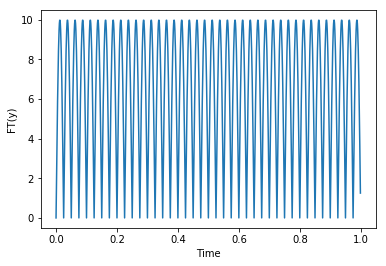

In [13]:
plt.plot(t, FT(y))
plt.xlabel('Time')
plt.ylabel('FT(y)')
plt.show()

Don't want to use time as x-axis, want frequency so a way is needed to convert the t values into frequency.

In the example run using numpy freq = np.fft.rfftfreq(len(y), d=0.001) was used. 

len(y) = 1000, this is the window length - need to find out what this is

d=0.001, this is the sample spacing (inverse of the sampling rate) - this is the same value as the one given for the timestep.

$1\,Hz = 1\,s^{-1}$ so $freq = \frac{1}{t}$

/home/mb17g15/.local/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


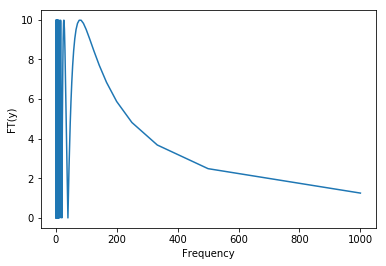

In [14]:
freq = 1 / t
plt.plot(freq, FT(y))
plt.xlabel('Frequency')
plt.ylabel('FT(y)')
plt.show()

/home/mb17g15/.local/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
  
Can't divide by 0 and the maximum value for the frequency should be 500 because of the nyquist frequency

The previous code was wrong as a second for loop is needed for the k values to give a weighted average.
$$X_k=\sum_{n=0}^{N-1}x_n\,exp\left({\frac{-i2\pi k n}{N}}\right )$$

To get the frequencies:
$$df = \frac{1}{Ndt}$$

In [15]:
def FT(function):
    N = len(function)  # this gives the total points
    F = []
    for k in range(N):
        f = 0.0
        for n in range(N):  # a loop up to N-1
            f += function[n] * cmath.exp(-1j * 2 * pi * k * n / N) # function[n] calls the nth value of the function
        F.append(abs(f))
    return F

def freq(function, dt=0.001):
    N = len(function)
    freq = []
    T = N * dt
    for k in range(N):
        v = k / T
        freq.append(v)
    return freq

In [16]:
t = np.arange(0, 1, 0.001)
y = np.sin(20 * 2* pi *t) * 10

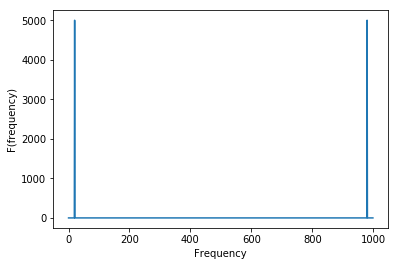

In [17]:
plt.plot(freq(y), FT(y))
plt.xlabel('Frequency')
plt.ylabel('F(frequency)')
plt.show()

Can't measure above the nyquist limit: 

$$f_{max} = \frac{1}{2 dt}$$

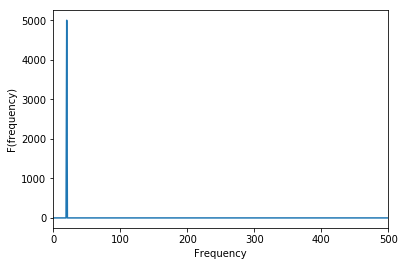

In [18]:
nf = 1 / (2 * 0.001)
plt.plot(freq(y), FT(y))
plt.xlabel('Frequency')
plt.ylabel('F(frequency)')
plt.xlim([0,nf])
plt.show()

At frequencies greater than the Nyquist frequency the weights used to calculate the average will be the same as when the frequencies are below the Nyquist frequency because the exponential used as the weight is periodic so after a particular k value it begins to repeat itself.

In [19]:
def Klist(function):
    N = len(function)  # this gives the total points
    Klist = []
    a = 0
    for k in range(N):
        a =+ k
        Klist.append(a)
    return Klist

def Weight(function):
    N = len(function)
    Weight = []
    for k in range(N):
        w = 0.0
        for n in range(N):
            w =+ cmath.exp(-1j * 2 * pi * k * n / N)
        Weight.append(w)
    return Weight

In [20]:
t = np.arange(0, 1, 0.001)
y = np.sin(20 * 2* pi *t) * 10

In [21]:
Weight(y)

[(1+0j),
 (0.9999802608561371+0.0062831439655596935j),
 (0.9999210442038161+0.012566039883354092j),
 (0.999822352380809+0.018848439715407738j),
 (0.9996841892832999+0.025130095443340446j),
 (0.9995065603657316+0.03141075907812756j),
 (0.9992894726405893+0.03769018266993366j),
 (0.9990329346781246+0.043968118317867434j),
 (0.9987369566060172+0.05024431817977549j),
 (0.9984015501089749+0.05651853448202676j),
 (0.9980267284282717+0.06279051952931192j),
 (0.9976125063612241+0.06906002571442192j),
 (0.997158900260614+0.07532680552793097j),
 (0.9966659280340303+0.08159061156815212j),
 (0.9961336091431721+0.08785119655074822j),
 (0.9955619646030799+0.09410831331851567j),
 (0.994951016981299+0.1003617148512267j),
 (0.9943007903969996+0.10661115427525392j),
 (0.993611310520008+0.11285638487348613j),
 (0.9928826045698119+0.11909716009488462j),
 (0.9921147013144782+0.12533323356430134j),
 (0.9913076310695056+0.13156435909229003j),
 (0.9904614256966467+0.13779029068467008j),
 (0.9895761186026468+0

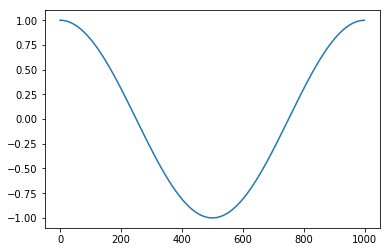

In [22]:
plt.plot(Klist(y),Weight(y))
plt.show()

This is symmetrical about k = 500 so it is after k = 500 that the frequencies do not need to be calculated

### Test on a combined sine wave ###

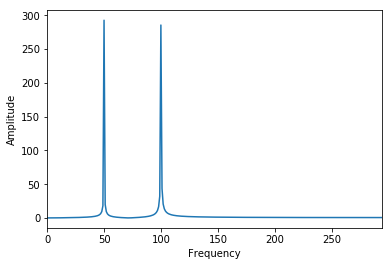

In [33]:
t = np.arange(0, 1, 0.0017)
y = np.sin(50 * 2 * np.pi * t) + np.sin(100 * 2 * np.pi * t)
nf = 1 / (2 * 0.0017)

plt.plot(freq(y, dt=0.0017), FT(y))
plt.xlim([0, nf])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()